In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train = dsets.MNIST(root='', download=True, train=True, transform=transforms.ToTensor())
val = dsets.MNIST(root='', download=True, train=False, transform=transforms.ToTensor())

100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 12559613.34it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 55111780.63it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|███████████████████████████| 1648877/1648877 [00:00<00:00, 12540124.85it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 7406892.99it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [12]:
train[0][1]

5

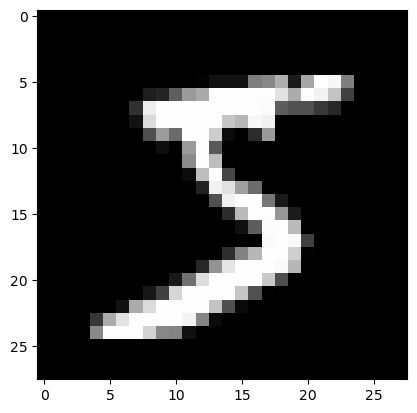

In [18]:
plt.imshow(train[0][0].view(28, 28), cmap='gray')

Text(0.5, 1.0, '0')

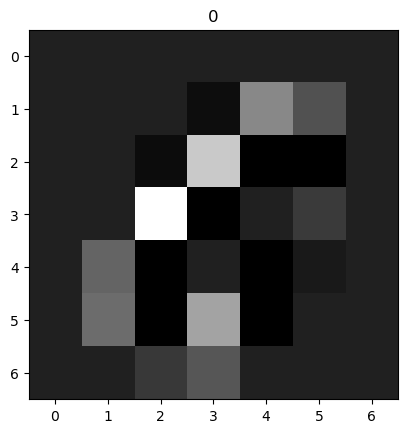

In [184]:
torch.manual_seed(1)
conv = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=1, kernel_size=4, stride=4, padding=1),
    nn.ReLU()
)
num = 1
img = conv(train[num][0])
plt.imshow(img.detach().numpy().reshape(7, 7), cmap='gray')
plt.title(str(train[num][1]))

In [195]:
torch.manual_seed(0)
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=3),
    nn.ReLU(),
    nn.Flatten(1),
    nn.Linear(81, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

In [196]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [197]:
tloader = DataLoader(dataset=train, batch_size=100)
vloader = DataLoader(dataset=val, batch_size=2000)

In [198]:
COST = []
ACCURACY = []
for epoch in range(10):
    
    correct = 0
    total = 0
    
    for x,y in vloader:
        z = model(x)
        _,yhat = torch.max(z.data, 1)
        correct = correct + (yhat == y).sum().item()
        total += len(y)
        
        
    for x,y in tloader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        COST.append(loss.item())
        loss.backward()
        optimizer.step()
        
    accuracy = correct / total
    ACCURACY.append(accuracy)
    print('percent done: ' + str(epoch) + ' - ' + str(accuracy))

percent done: 0 - 0.0776
percent done: 1 - 0.9287
percent done: 2 - 0.956
percent done: 3 - 0.9618
percent done: 4 - 0.957
percent done: 5 - 0.9627
percent done: 6 - 0.966
percent done: 7 - 0.965
percent done: 8 - 0.9657
percent done: 9 - 0.9753


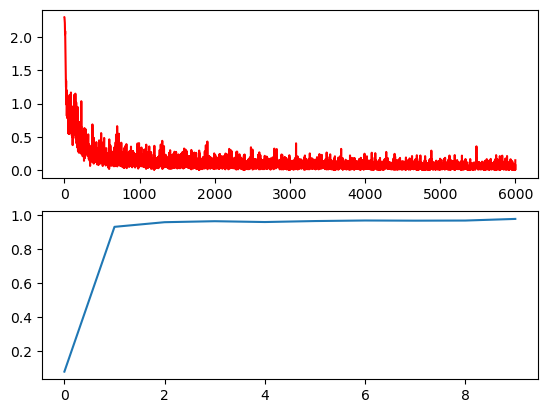

In [199]:
plt.subplot(2, 1, 1)
plt.plot(COST, c='r')
plt.subplot(2, 1, 2)
plt.plot(ACCURACY)
plt.show()

In [201]:
correct = 0
total = 0
    
for x,y in vloader:
    z = model(x)
    _,yhat = torch.max(z.data, 1)
    correct = correct + (yhat == y).sum().item()
    total += len(y)
        
print('final accuracy: ' + str(correct/total))

final accuracy: 0.973
